In [1]:
import pandas as pd
import neuroglancer as ngl

In [2]:
df = pd.read_csv("/usr/people/nturner/research/pinky100/p100_run/pinky100_final.df", index_col=0)

In [3]:
presyn_segs = df.presyn_segid[~pd.isnull(df.presyn_segid)].astype("int").tolist()
postsyn_segs = df.postsyn_segid[~pd.isnull(df.postsyn_segid)].astype("int").tolist()

In [4]:
import collections

In [5]:
presyn_counts = collections.Counter(presyn_segs)
postsyn_counts = collections.Counter(postsyn_segs)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
has_presyn = set(presyn_counts.keys())
only_postsyn_counts = dict(filter(lambda x: x[0] not in has_presyn, postsyn_counts.items()))

In [8]:
over_10 = dict(filter(lambda x: x[1] > 10, only_postsyn_counts.items()))

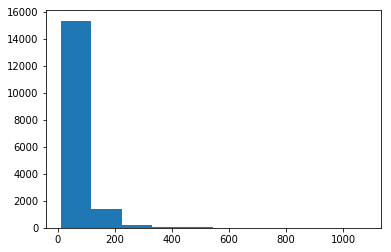

In [9]:
plt.hist(over_10.values())
plt.show()

In [10]:
over_250 = dict(filter(lambda x: x[1] > 250, over_10.items()))

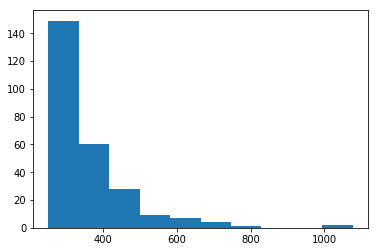

In [11]:
plt.hist(over_250.values())
plt.show()

In [12]:
over_n = lambda x, n: dict(filter(lambda y: y[1] > n, x))

In [13]:
over_500 = over_n(over_250.items(), 500)

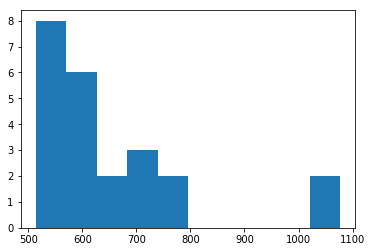

In [14]:
plt.hist(over_500.values())
plt.show()

In [15]:
import random

In [16]:
over_10_ids = random.sample(over_10.keys(), 50)
over_250_ids = random.sample(over_250.keys(), 20)

# Setting up neuroglancer

In [26]:
ngl.set_static_content_source(url="http://neuromancer-seung-import.appspot.com")
viewer = ngl.Viewer()
viewer

http://127.0.0.1:36476/v/137c86ff416066a81fc8081b7b1147d4b34a8086/

In [28]:
img_src = "precomputed://gs://neuroglancer/pinky100_v0/son_of_alignment_v15_rechunked"
seg_src = "precomputed://gs://neuroglancer/pinky100_v0/seg/lost_no-random/bbox1_0"

with viewer.txn() as state:
    
    state.layers["image"] = ngl.ImageLayer(source=img_src)
    state.layers["seg"] = ngl.SegmentationLayer(source=seg_src)

In [49]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = over_10_ids

In [30]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = over_250_ids

In [44]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = list(over_500.keys())

In [48]:
over_10_ids = random.sample(over_10.keys(), 500)

In [52]:
import operator

In [54]:
max(over_10.items(), key=operator.itemgetter(1))

(1400466590684, 1077)

In [55]:
with viewer.txn() as state:
    state.layers["seg"].layer.segments = [1400466590684]

All of these samples seem fine. Saving out the list of segment ids

In [57]:
fname = "/usr/people/nturner/seungmount/research/nick_and_sven/data/180920_orphan_dend_ids"
with open(fname, "w+") as f:
    f.write("\n".join(map(str,over_10.keys())))

# Saving the meshes

In [17]:
from meshparty import mesh_io

In [18]:
OUTPUT_DIR = "/usr/people/nturner/seungmount/research/nick_and_sven/data/180920_orphan_dends"

In [19]:
CV_PATH = "gs://neuroglancer/pinky100_v0/seg/lost_no-random/bbox1_0"

In [23]:
from importlib import reload
reload(mesh_io)

<module 'meshparty.mesh_io' from '/usr/people/nturner/miniconda3/lib/python3.6/site-packages/meshparty/mesh_io.py'>

In [21]:
!mkdir {OUTPUT_DIR}

mkdir: cannot create directory ‘/usr/people/nturner/seungmount/research/nick_and_sven/data/180920_orphan_dends’: File exists


In [21]:
mesh_io.__file__

'/usr/people/nturner/miniconda3/lib/python3.6/site-packages/meshparty/mesh_io.py'

In [ ]:
mesh_io.download_meshes(list(over_10.keys()), OUTPUT_DIR, CV_PATH, 4, fmt="obj")

Existence Testing:   0%|          | 0/1 [00:00<?, ?it/s]
Downloading: 86it [00:00, 108.54it/s]                       
Existence Testing:   0%|          | 0/1 [00:00<?, ?it/s]
Downloading: 56it [00:00, 156.94it/s]                        
Existence Testing:   0%|          | 0/1 [00:00<?, ?it/s]
Downloading: 46it [00:00, 137.36it/s]                        
Existence Testing:   0%|          | 0/1 [00:00<?, ?it/s]
Downloading: 130it [00:01, 97.05it/s]                       
Existence Testing:   0%|          | 0/1 [00:00<?, ?it/s]
Downloading: 166it [00:01, 103.79it/s]                      
Existence Testing:   0%|          | 0/1 [00:00<?, ?it/s]
Downloading: 24it [00:00, 56.66it/s]               
Existence Testing:   0%|          | 0/1 [00:00<?, ?it/s]
Downloading: 46it [00:00, 99.22it/s]                         
Existence Testing:   0%|          | 0/1 [00:00<?, ?it/s]
Downloading: 120it [00:01, 92.20it/s]                       
Existence Testing:   0%|          | 0/1 [00:00<?, ?it/s]
Downl